# Converting to HSV

In [1]:
#export
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import pdb

In [3]:
#export
from Export.nb_PixelManipulation import *
from Export.nb_HistogramEqualisation import *

In [4]:
frog_img = cv2.imread('Images/dat_boi.jpg')
stub_colors = [
    np.array([255,255,255], dtype = np.uint8),
    np.array([255,255,0], dtype = np.uint8),
    np.array([255,0,255], dtype = np.uint8),
    np.array([0,255,255], dtype = np.uint8),
    np.array([255,0,0], dtype = np.uint8),
    np.array([0,255,0], dtype = np.uint8),
    np.array([0,0,255], dtype = np.uint8),
    np.array([0,0,0], dtype = np.uint8)
]

## Viewing an image by channel

In [5]:
#export
def showEachChannel(img, **kwargs):
    plt.figure(figsize=(20,10))
    plt.subplot(1,3,1);
    showImage(img[:, :, 0], **kwargs)
    plt.subplot(1,3,2);
    showImage(img[:, :, 1], **kwargs)
    plt.subplot(1,3,3);
    showImage(img[:, :, 2], **kwargs)

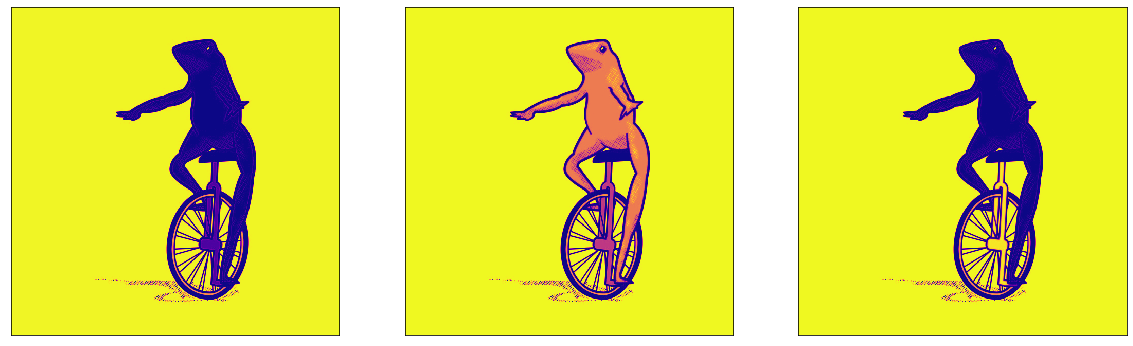

In [6]:
showEachChannel(frog_img, cmap = 'plasma')

## Converting to HSV from RGB

In [7]:
#export
def getHueFromChroma(col_arr : np.array, chroma: np.float32, max_col : np.float32, min_col : np.float32):
    if chroma == 0:
        hue = 255
    elif max_col == 0:
        hue = (col_arr[1] - col_arr[2]) / chroma
        hue %= 6
    elif max_col == 1:
        hue = (col_arr[2] - col_arr[0]) / chroma
        hue += 2
    elif max_col == 2:
        hue = (col_arr[0] - col_arr[1]) / chroma
        hue += 4
    hue *= (255/6)
    return hue

def getSatuationFromChroma(col_arr : np.array, chroma : np.float32, value : np.float32):
    saturation = 0 if value == 0 else (chroma / value) * (255/3)
    return saturation

def convertRGBToHSVColor(colours : np.array):
    col_arr = np.float32(colours)
    min_col = colours.argmin()
    max_col = colours.argmax()
    chroma = col_arr[max_col] - col_arr[min_col]
    hue = getHueFromChroma(col_arr, chroma, max_col, min_col)
    value = np.mean(col_arr)
    saturation = getSatuationFromChroma(col_arr, chroma, value)
    return np.array([hue, saturation, value], dtype = np.uint8)

In [8]:
print('RGB,', stub_colors[0], '=', 'HSV,', convertRGBToHSVColor(stub_colors[0]))
print('RGB,', stub_colors[1], '=', 'HSV,', convertRGBToHSVColor(stub_colors[1]))
print('RGB,', stub_colors[2], '=', 'HSV,', convertRGBToHSVColor(stub_colors[2]))
print('RGB,', stub_colors[3], '=', 'HSV,', convertRGBToHSVColor(stub_colors[3]))
print('RGB,', stub_colors[4], '=', 'HSV,', convertRGBToHSVColor(stub_colors[4]))
print('RGB,', stub_colors[5], '=', 'HSV,', convertRGBToHSVColor(stub_colors[5]))
print('RGB,', stub_colors[6], '=', 'HSV,', convertRGBToHSVColor(stub_colors[6]))
print('RGB,', stub_colors[7], '=', 'HSV,', convertRGBToHSVColor(stub_colors[7]))

RGB, [255 255 255] = HSV, [ 85   0 255]
RGB, [255 255   0] = HSV, [ 42 127 170]
RGB, [255   0 255] = HSV, [212 127 170]
RGB, [  0 255 255] = HSV, [127 127 170]
RGB, [255   0   0] = HSV, [  0 255  85]
RGB, [  0 255   0] = HSV, [ 85 255  85]
RGB, [  0   0 255] = HSV, [170 255  85]
RGB, [0 0 0] = HSV, [85  0  0]


## Converting an entire image from RBG to HSV

In [9]:
#export
def convertToHSV(img : np.array):
        
    img, height, width, channels, im_size = getChannels(img)
    hsv_img = img.copy()
    current_colour = np.ndarray(3, dtype = np.uint8)
    last_channel = channels - 1
    
    i = 0; j = 0; k = 0
    for px in np.nditer(img):
        current_colour[k] = px
        if (k % channels) == last_channel:
            hsv_img[i, j, :] = convertRGBToHSVColor(current_colour)
        i, j, k = iterateImage(i, j, k, channels, width)
    return hsv_img

In [10]:
hsv_frog = convertToHSV(frog_img)

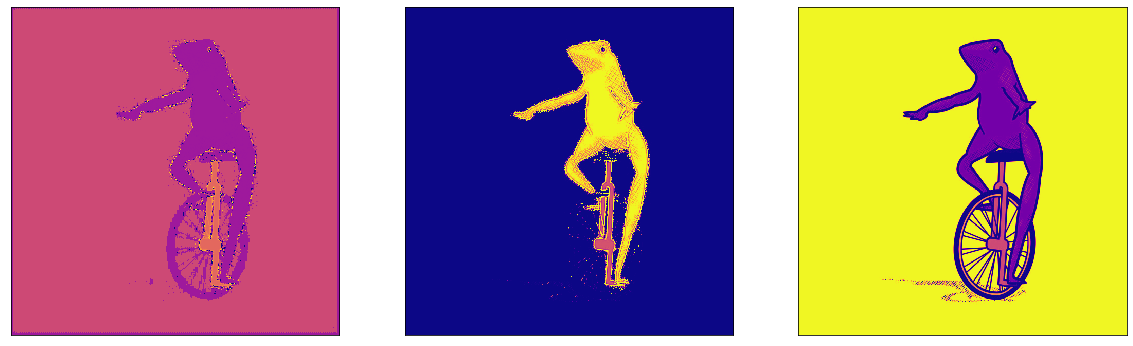

In [11]:
showEachChannel(hsv_frog, cmap = 'plasma')

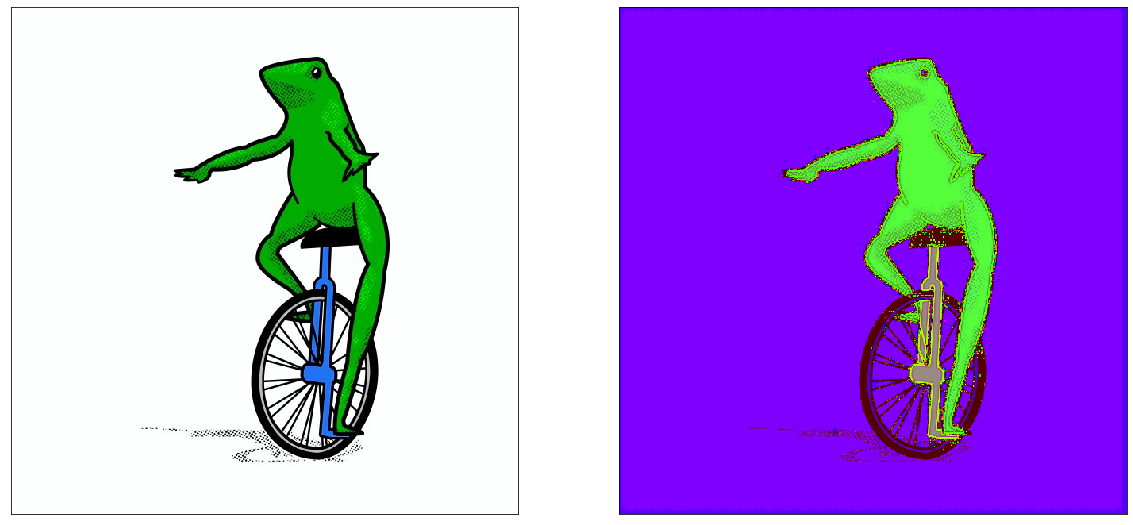

In [12]:
compareTwoImages(frog_img, hsv_frog)

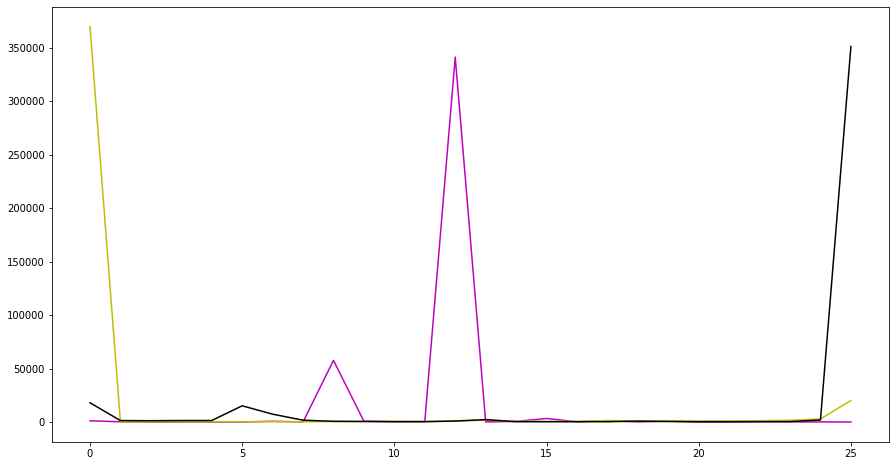

In [13]:
hsv_histogram = computeHistogram(hsv_frog, 25)
plotHistogram(hsv_histogram, col_channels = ('m', 'y', 'k'))

## Finding Contrast around the uni-cycle

The uni-cycle has a distictive hue and saturation. The frog's skin has a different a different hue. Let us try to find distinctive ranges foe the HSV of each of the colour channels.

In [14]:
channel_range_1 = ChannelRange(np.array([100, 200, 100, 150, 100, 150], dtype = np.uint8))

In [15]:
hsv_contrast_1 = enhanceContrast(hsv_frog, channel_range_1)

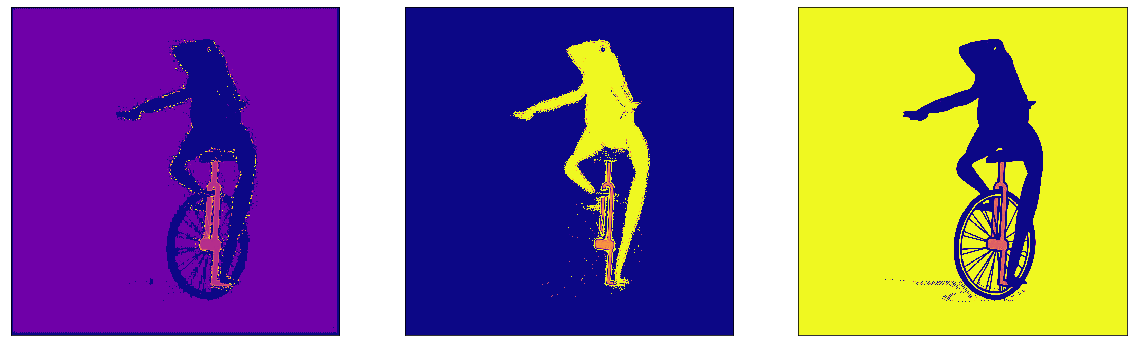

In [16]:
showEachChannel(hsv_contrast_1, cmap = 'plasma')

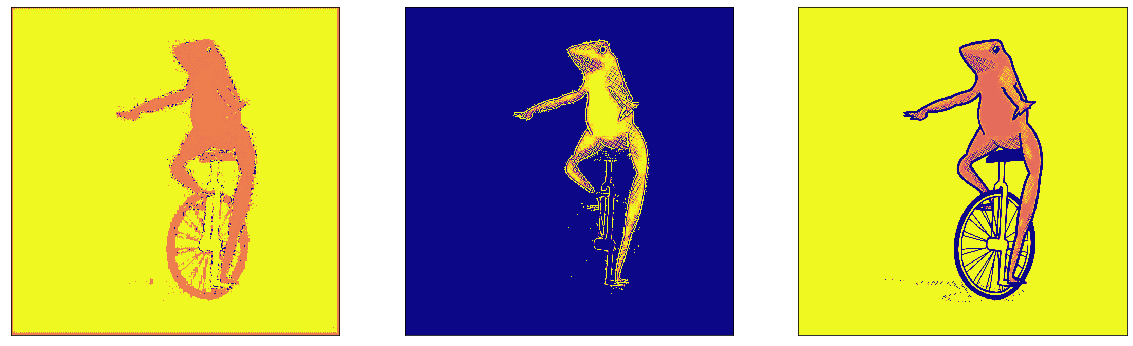

In [17]:
channel_range_2 = ChannelRange(np.array([50, 100, 175, 255, 25, 75], dtype = np.uint8))
hsv_contrast_2 = enhanceContrast(hsv_frog, channel_range_2)
showEachChannel(hsv_contrast_2, cmap = 'plasma')

## Conclusion

The pictures generated in this notebook can be used for a vinyl cover.

## Export

In [18]:
!python notebook2script.py ConvertToHSV.ipynb

Converted ConvertToHSV.ipynb to Export\nb_ConvertToHSV.py
